$\newcommand{\is}{\mathrel{\mathop:=}}$
$\newcommand{\range}{\mathop{ran}}$
$\newcommand{\setof}[1]{\left \{ #1 \right \}}$
$\newcommand{\card}[1]{\left | #1 \right |}$
$\newcommand{\tuple}[1]{\left \langle #1 \right \rangle}$
$\newcommand{\emptytuple}{\left \langle \right \rangle}$
$\newcommand{\tuplecat}{\cdot}$
$\newcommand{\stringcat}{\cdot}$
$\newcommand{\emptystring}{\varepsilon}$
$\newcommand{\String}[1]{\mathit{#1}}$
$\newcommand{\LeftEdgeSymbol}{\rtimes}$
$\newcommand{\RightEdgeSymbol}{\ltimes}$
$\newcommand{\LeftEdge}{\LeftEdgeSymbol}$
$\newcommand{\RightEdge}{\RightEdgeSymbol}$
$\newcommand{\mult}{\times}$
$\newcommand{\multisum}{\uplus}$
$\newcommand{\multimult}{\otimes}$
$\newcommand{\freqsymbol}{\mathrm{freq}}$
$\newcommand{\freq}[1]{\freqsymbol(#1)}$
$\newcommand{\prob}{P}$
$\newcommand{\counts}[2]{\card{#2}_{#1}}$
$\newcommand{\inv}[1]{#1^{-1}}$
$\newcommand{\Lex}{\mathit{Lex}}$
$\newcommand{\length}[1]{\left | #1 \right |}$
$\newcommand{\suc}{S}$
$\newcommand{\sprec}{<}$
$\newcommand{\Rcomp}[2]{#1 \circ #2}$
$\newcommand{\domsymbol}{\triangleleft}$
$\newcommand{\idom}{\domsymbol}$
$\newcommand{\pdom}{\domsymbol^+}$
$\newcommand{\rdom}{\domsymbol^*}$
$\newcommand{\indegree}[1]{\mathrm{in(#1)}}$
$\newcommand{\outdegree}[1]{\mathrm{out(#1)}}$
$\newcommand{\cupdot}{\cup\mkern-11.5mu\cdot\mkern5mu}$
$\newcommand{\mymatrix}[1]{\left ( \matrix{#1} \right )}$
$\newcommand{\id}{\mathrm{id}}$

# Dealing with stop words

## Stop words: The intuition

The bag of words model can be used for a variety of tasks.
In fact, it is part of almost every natural language model in the industry: web search, word prediction, spell checking, machine translation, chatbots, you name it.
None of these applications count all the words in the text.
Instead, many words are ignored, just like we only used counts for a few words like *Aristotle*, *Plato*, *ethics*, and *metaphysics* in the previous notebook.
The reason is simple: if we kept track of the counts for every single word, then interesting words like *Plato* and *ethics* would be completely drowned out by irrelevant high-frequency words like *the* and *is*.

<div class=example>
In the previous notebook we had counts for four websites $w_1$, $w_2$, $w_3$ and $w_4$, as shown below.
$$
$$\begin{array}{rl}
    w_1 & \is \setof{\text{Aristotle}: 9, \text{ethics}: 3, \text{metaphysics}: 0, \text{Plato}: 6, \text{Sokrates}: 0}\\
    w_2 & \is \setof{\text{Aristotle}: 1, \text{ethics}: 0, \text{metaphysics}: 9, \text{Plato}: 5, \text{Sokrates}: 0}\\
    w_3 & \is \setof{\text{Aristotle}: 4, \text{ethics}: 9, \text{metaphysics}: 5, \text{Plato}: 8, \text{Sokrates}: 2}\\
    w_4 & \is \setof{\text{Aristotle}: 0, \text{ethics}: 7, \text{metaphysics}: 3, \text{Plato}: 9, \text{Sokrates}: 0}\\
\end{array}$$
$$
With these counts, the best match for the query *Aristotle metaphysics* is $w_1$ (assuming that the first word of the query is 50\% more important than the second one).
Now suppose that the query is *Aristotle's metaphysics*, which we analyze as consisting of three words: *Aristotle*, the possessive marker *'s*, and *metaphysics*.
Since we have no counts for the possessive marker, the results don't change and $w_1$ is still the best match.

But let's assume that we actually included counts for *'s*, yielding the following multisets:
$$
$$\begin{array}{rl}
    w_1 & \is \setof{\text{Aristotle}: 9, \text{ethics}: 3, \text{metaphysics}: 0, \text{Plato}: 6, \text{Sokrates}: 0,
    \text{'s}: 20}\\
    w_2 & \is \setof{\text{Aristotle}: 1, \text{ethics}: 0, \text{metaphysics}: 9, \text{Plato}: 5, \text{Sokrates}: 0,
    \text{'s}: 27}\\
    w_3 & \is \setof{\text{Aristotle}: 4, \text{ethics}: 9, \text{metaphysics}: 5, \text{Plato}: 8, \text{Sokrates}: 2,
    \text{'s}: 2}\\
    w_4 & \is \setof{\text{Aristotle}: 0, \text{ethics}: 7, \text{metaphysics}: 3, \text{Plato}: 9, \text{Sokrates}: 0,
    \text{'s}: 86}\\
\end{array}$$
$$
The corresponding multisets for the words in the query are $_MA$ for *Aristotle*, $_MP$ for *metaphysics*, and $_MS$ for the possessive marker.
$$
$$\begin{array}{rl}
    _MA & \is \setof{w_1: 9, w_2: 1, w_3: 4, w_4: 0}\\
    _MP & \is \setof{w_1: 0, w_2: 9, w_3: 5, w_4: 3}\\
    _MS & \is \setof{w_1: 20, w_2: 27, w_3: 2, w_4: 86}\\
\end{array}$$
$$
Let's assume a weighting where the counts for the $n$-th query are multiplied by $\frac{1}{n}$ (rounded down).
$$
\begin{align*}
    1 \multimult _MA \multisum
    \frac{1}{2} \multimult _MS \multisum
    \frac{1}{3} \multimult _MP
    &=
    \setof{w_1: 9, w_2: 1, w_3: 4, w_4: 0}
    \multisum
    \setof{w_1:10, w_2: 13, w_3: 1, w_4: 43}
    \multisum
    \setof{w_1: 0, w_2: 3, w_3: 1, w_4: 1}
    \\
    &=
    \setof{w_1: 19, w_2: 17, w_3: 6, w_4: 44}
\end{align*}
$$
As you can see, $w_4$ is now the best match, even though it does not contain a single mention of *Aristotle*, the most important word in the search query.
</div>

This example shows that not all words are on equal footing as far as the bag of words model is concerned.
Some contribute useful information, whereas others are pretty useless.
At the best, they add unnecessary clutter to the set, at worst, they make the model worse.

The problem of cluttered sets is a very real one.
This is due to **Zipf's law**, which was formulated by the linguist [George Kingsley Zipf](https://en.wikipedia.org/wiki/George_Kingsley_Zipf).

<div class=definition>
    Let $t$ be a text of natural language utterances, and $R$ a linear ranking of words by their frequency in $t$.
    Then the frequency $f$ of a word in $t$ is inversely proportional to its rank $r$ in $R$ ($f = \frac{1}{r}$).
</div>

Zipf's law tell us that the most common word in a text occurs

- two times as often as the second most common one,
- three times as often as the third most common one,
- four times as often as the fourth most common one,
- and so on.

So if the most common word occurs 100 times, the second occurs 50 times, the third one 33 times, the fourth one 25 times, and so on.
As in all statistical claims, there is a certain margin of error, so the second word may actually occur 57 times and the third one 26 times.
It also happens quite a lot that multiple word have approximately the same rank.
This means that the most common word may occur 100 times, the next three each around 50 times, and then the next two 33 times.
In this case, Zipf's law still holds across ranks, but each rank may correspond to multiple words.

These minor details do not change the fact, though, that the frequency distribution of a natural language will have a very peculiar shape.
A few word types make up the majority of word tokens in a text while many other word types only have one token each.

If we draw a plot with the word types in a text in descending frequency along the $x$-axis and their number of tokens as the $y$-axis, this produces a curve that starts out high, drops off quickly, and then has a very long tail that approaches 0 but never reaches it.

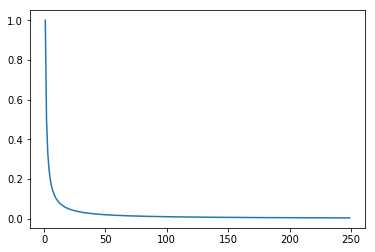

In [1]:
# import plotting library as plt
import matplotlib.pyplot as plt
import numpy as np

# define a function with Zipfian distribution
def f(x):
    return 1/x

# possible values for x: 1, 2, 3, 4, ..., 250
x = np.arange(1, 250)

# compute f(x) for every x
plt.plot(x, f(x))

# show the plotted diagram
plt.show()

<div class=exercise>
Suppose you have a text with 20,000 words where the most frequent word occurs 1068 times.
Assuming a distribution that is exactly Zipfian, calculate the frequencies for rank 2, 3, 5, 15, 50, 100, 200, 500, and 1000.
Give a rough estimate how many of the top ranks jointly make up at least 50% of the text.
</div>

Zipf's law is more than an interesting curiosity, it has noticeable repercussions in practice.
In fact, it is one of the primary reasons why language technology is still much less capable than humans despite the recent advances in machine learning.
Machine learning algorithms are designed to focus on the robust, very frequent aspects of a data set while ignoring the rare outliers.
But Zipf's law tells us that this is exactly the wrong approach for language.
Here is what you get if you take the first 250 words of *Moby Dick* and throw away any words that aren't among the 250 most common in the book.

In [2]:
import urllib.request
import re
from collections import Counter

urllib.request.urlretrieve("http://www.gutenberg.org/files/2701/2701.txt", "mobydick.txt")
with open("mobydick.txt", "r") as text:
    # tokenize string into list of lowercase words
    text = re.split("[^\w]", text.read().lower())
    # compute most frequent word types
    most_frequent = [count[0] for count in Counter(text).most_common(250)]
    # find the beginning of Chapter 1 in the file
    for n in range(len(text)):
        if text[n] == "call" and\
        text[n+1] == "me" and\
        text[n+2] == "ishmael":
            start = n
            break
    try:
        # and now take the first 250 words and remove all infrequent ones
        filtered = [word for word in text[n:n+250]
                    if word in most_frequent]
        # and put the tokenized list back into a string
        print(" ".join(filtered))
    except:
        print("Couldn't find start")

HTTPError: HTTP Error 404: Not Found

Not too illuminating, is it?
With language, it is the outliers that are interesting rather than the very frequent stuff.
An algorithm that favors the excessively common over the rare is ill-suited for language.

Alright, let us return to our original bag of words model and improve it by removing uninformative word types from the unigram set.
First we must agree on what counts as an uninformative word type.
For the sake of simplicity, we will consider a word type uninformative iff it is a **stop word**, i.e. a word type with a very high token frequency.

Here is a list of English stop words (using a very lenient definition of word that also includes contractions):

> a, about, above, after, again, against, all, am, an, and, any, are, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can't, cannot, could, couldn't, did, didn't, do, does, doesn't, doing, don't, down, during, each, few, for, from, further, had, hadn't, has, hasn't, have, haven't, having, he, he'd, he'll, he's, her, here, here's, hers, herself, him, himself, his, how, how's, i, i'd, i'll, i'm, i've, if, in, into, is, isn't, it, it's, its, itself, let's, me, more, most, mustn't, my, myself, no, nor, not, of, off, on, once, only, or, other, ought, our, ours, ourselves, out, over, own, same, shan't, she, she'd, she'll, she's, should, shouldn't, so, some, such, than, that, that's, the, their, theirs, them, themselves, then, there, there's, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, very, was, wasn't, we, we'd, we'll, we're, we've, were, weren't, what, what's, when, when's, where, where's, which, while, who, who's, whom, why, why's, with, won't, would, wouldn't, you, you'd, you'll, you're, you've, your, yours, yourself, yourselves

Given such a list of stop words, it is a simple task to remove all stop words from a text.

<div class=example>
Here is a very short mini-text, the first sentence of Samuel Beckett's novel *Murphy*: *The sun shone, having no alternative, on the nothing new*.
We can then go through the text word by word and delete each word token that is on our list of stop words.
We ignore capitalization, but treat punctuation as separate words.

<ol>
<li>*the*: delete</li>
<li>*sun*: keep</li>
<li>*shone*: keep</li>
<li>*,*: keep</li>
<li>*having*: delete</li>
<li>*no*: delete</li>
<li>*alternative*: keep</li>
<li>*,*: keep</li>
<li>*on*: delete</li>
<li>*the*: delete</li>
<li>*nothing*: keep</li>
<li>*new*: keep</li>
<li>*.*: keep</li>
<li>
</ol>

After stop word removal, the sentence has been truncated to *sun shone, alternative, nothing new*.
Clearly the removal of stop words has completely destroyed the meaning of the sentence for humans.
But a bag of words model can't capture meaning at this abstract level anyways, it can at best give a rough estimate as to what topics a text is about.
For this limited understanding of text, removing stop words improves results.
</div>

<div class=exercise>
Igoring capitalization, what do the following strings look like after stop word removal?

<ol>
<li>Hi! What's up?</li>
<li>How much wood would a woodchuck chuck if a woodchuck could chuck wood?</li>
<li>I'm here to kick ass and chew bubblegum, and I'm all out of gum.</li>
<li>There is no spoon.</li>
<li>John loves Peter.</li>
<li>Every student hates some professor.</li>
<li>Some student hates some professor.</li>
</ol>

Are there any sentences whose original meaning can still inferred after stop word removal?
If so, why might that be?
</div>

## Stop word removal as a function

If you were to implement stop word removal in a programming language, say Python, you'd probably write it as a **function**.

In [3]:
import re

def remove_stopwords(text, stopwords):
    text_list = re.findall(r"\w+", text)
    return ' '.join([word for word in text_list
                     if word not in stopwords])

stopwords = ["a", "the", "have", "having", "no", "not", "on", "in"]
text = "the sun shone, having no alternative, on the nothing new."
print(remove_stopwords(text, stopwords))

sun shone alternative nothing new


A function is like an abstract machine that takes one or more **arguments** as input and combines and alters them in some way to produce a unique output.
In the code above, the function `remove_stopwords` 

- takes two inputs
    1. a string as its first argument (called `text` in the code)
    1. a list of stop words as its second argument
- produces as its output a new string, which is the result of taking the first argument and removing all stop words (and all punctuation) as specified by the second argument.

The Python code is pretty cumbersome to read because it has to take care of all kinds of programming details.
For instance, the string first has to be converted to a list of words, and then this list has to be reassembled into a string after stop words have been removed.
The mathematical perspective can abstract away from these details to define functions in much simpler terms.


## Mathematical functions

Mathematics has specialized notation to talk about functions, but let's put that aside for now.
The most important fact about functions is that they can be so much more than what you've seen in your high school class.
Yes $f(x) = 2 \mult x $ is a function that takes a number as its only argument and doubles it.
But so many more things are functions.
A function is any kind of system that takes a fixed number of inputs and always returns the same output for the same input.

<div class=example>
Consider $f(x) = x$.
This is a function: it takes a fixed number of arguments (i.e. one) and the value of $f(x)$ stays the same as long as $x$ does not change.
</div>

<div class=example>
Another mathematical function is $f(x) = 1$.
This is a constant function, which means that all arguments yield the same output.
</div>

<div class=example>
Each $n$-gram grammar can be regarded as a function that maps strings to 1 (= well-formed) or 0 (= ill-formed).
Given a fixed grammar $G$, a string $s$ is either well-formed or ill-formed, but never both.
So $G$ assigns a unique value to $s$ that never changes.

<br>
The functional perspective of $n$-gram grammars will be very useful later on when we consider probabilistic version of n-gram grammars.
</div>

<div class=example>
A [dispersive prism](https://en.wikipedia.org/wiki/Dispersive_prism) breaks light down into its spectral colors.
It thus is a function that takes light as input and produces a unique spectral decomposition as its output.
</div>

<div class=example>
A soda machine is a function that takes two inputs: a fixed monetary value (usually fed in piecewise as coins) and a number that encodes your choice of beverage.
If everything is in order, it outputs the desired beverage.
If something is wrong with the input, you don't get anything.
</div>

<div class=exercise>
A soda machine corresponds to different functions depending on

<ol>
<li>how much change it has,</li>
<li>which beverages are in stock.</li>
</ol>

Explain why.
</div>

<div class=exercise>
For each one of the following, say whether or not it is a function (i.e. it takes a fixed number of arguments and no input can yield more than one output).
If things can go either way depending on additional assumptions, explain why.

<ol>
<li>$f(x) = x^2 - x$</li>
<li>an address book that only contains names and phone numbers</li>
<li>a spam filter for emails</li>
<li>chess</li>
<li>$\in$</li>
<li>the US laws for assigning children to schools</li>
</ol>
</div>

Given this very general understanding of functions, we can define stop word removal as a function $\mathrm{del}$ that takes as its input a string $s$ and a set $S$ of stop words.
Then the output $\mathrm{del}(s,S)$ is the unique string that is obtained from $s$ by deleting every symbol that is a member of $S$.
And that's pretty much all that needs to be said.

How exactly this deletion is carried out is immaterial here.
We could process $s$ from left-to-right, right-to-left, inside out, or do something more complex like in the Python code above.
None of these distinctions affect what output is produced by $\mathrm{del}(s,S)$.
This is the strength of a mathematical definition of a function.
It cuts out the procedural details to clearly state the connection between inputs and outputs.

You might be flummoxed, though, that we defined $\mathrm{del}(s,S)$ is plain English. 
All the functions you know from school were probably stated in terms of equations, e.g. $f(x,y,z) = x^y - 5 \mult z$.
This isn't a necessity.
Sometimes a function can be stated clearly enough without special notation.
But for the curious among you, the next notebook gives a more formal definition of $\mathrm{del}(s,S)$.

You might also be wondering what we gain from defining stop word removal in mathematical terms.
The notebook after the next one illustrates how a more abstract understanding in terms of mathematical functions can reveal surprising parallels between problems that seem entirely unrelated.

## Recap

- Many aspects of language exhibit a Zipfian distribution.

<div class=definition>
    Let $t$ be a text of natural language utterances, and $R$ a linear ranking of words by their frequency in $t$.
    Then the frequency $f$ of a word in $t$ is inversely proportional to its rank $r$ in $R$ ($f = \frac{1}{r}$).
</div>

- Over 50% of any natural language text are made up from a few very high frequency words like *a*, *the*, *is*, *of*, and so on.

- These **stop words** must be removed in order for bag of words models to perform well.

- Stop word removal can be regarded as a mathematical function that takes as its input a string $s$ and a set $S$ of symbols and returns a string that is identical to $s$ except that all symbols that belong to $S$ have been deleted.